# Using SCOTCH to integarte MERFISH and singl-cell ATAC-seq data of mouse brain cortex

## Import required python packages

In [2]:
import pandas as pd
import anndata as ad
import scanpy as sc
import numpy as np
from scotch import *

## Load datasets

In [3]:
rna = load_data("/slurm/home/yrd/fanlab/yangpenghui/SCOTCH/data/mouse-brain/rna.h5ad")
gam = load_data("/slurm/home/yrd/fanlab/yangpenghui/SCOTCH/data/mouse-brain/gam.h5ad")
atac = load_data("/slurm/home/yrd/fanlab/yangpenghui/SCOTCH/data/mouse-brain/atac.h5ad")
gam = gam[atac.obs.index]

## Process datasets

### Process scRNA-seq dataset

Processing RNA data...
Identifying highly variable genes...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Normalizing total counts...
Applying log1p transformation...
Saving pre-log1p counts to a layer...
Scaling the data...
Performing PCA...
Calculating neighbors based on cosine metric...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Performing UMAP...


... storing 'cell_type' as categorical


Processing completed.


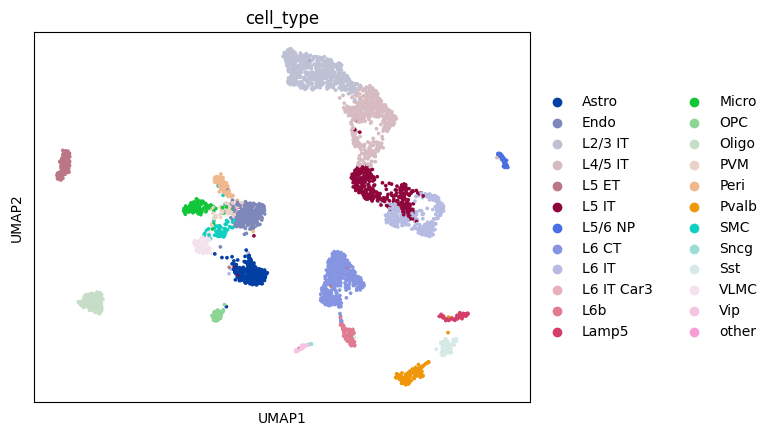

In [4]:
# Processing
rna = process_anndata(rna)
sc.pl.umap(rna, color="cell_type")

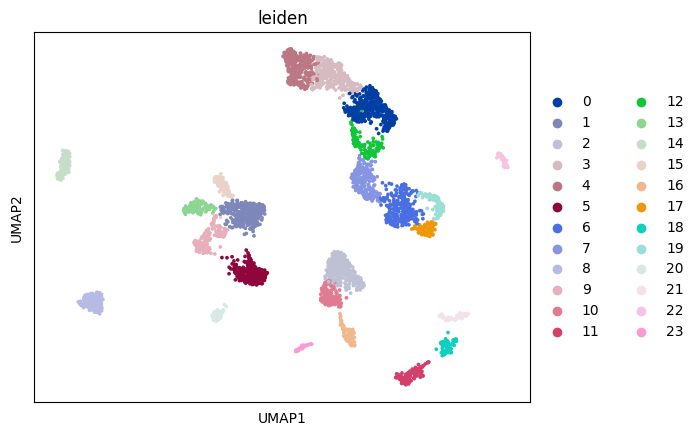

In [6]:
sc.tl.leiden(rna,resolution = 1)
sc.pl.umap(rna, color="leiden")

### Process scATAC-seq dataset

Processing ATAC data...
Running LSI...
Calculating neighbors based on cosine metric using X_lsi...
Performing UMAP...
Processing completed.


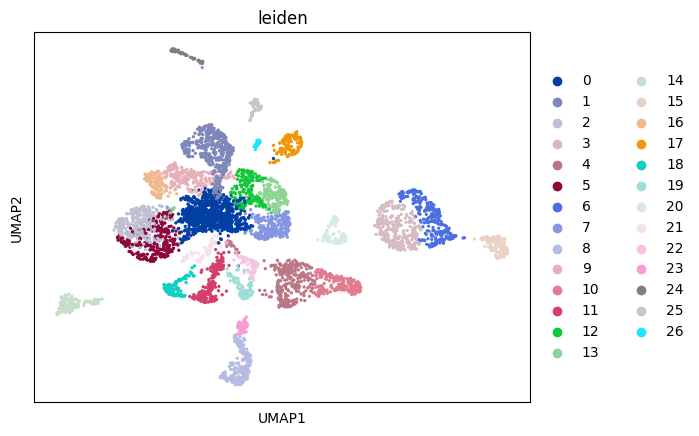

In [7]:
atac = process_anndata(atac,mode='atac')
sc.tl.leiden(atac,resolution = 1)
sc.pl.umap(atac, color="leiden")

### Process scATAC-seq dataset (gene activity score)

In [8]:
gam = process_anndata(gam,pca=False,neighbors=False,umap=False)
gam = gam[atac.obs.index]
gam.obs['leiden'] = atac.obs['leiden']

Processing RNA data...
Identifying highly variable genes...


Trying to set attribute `.uns` of view, copying.


Normalizing total counts...
Applying log1p transformation...
Saving pre-log1p counts to a layer...
Scaling the data...


Trying to set attribute `.obs` of view, copying.


Processing completed.


In [ ]:
gam.obsm['reduction'] = atac.obsm['X_lsi']
rna.obsm['reduction'] = rna.obsm['X_pca']

## Transfer labels

In [11]:
# Calculate marker genes
adata1,adata2 = find_marker(rna,gam,min_cells=0,top_marker_num=10)

/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
Trying to set attribute `.uns` of view, copying.


Finding marker genes...
Number of common genes: 231
Calculating marker genes based on 'leiden' for adata1...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_

Calculating marker genes based on 'leiden' for adata2...
Marker gene calculation completed.


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_

Performing label transfer...
Calculating average expression...
Computing correlation matrix...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
Trying to set attribute `.obs` of view, copying.


Performing unbalanced optimal transport...
Applying cutoff to transfer probabilities and mapping labels...
Label transfer completed.


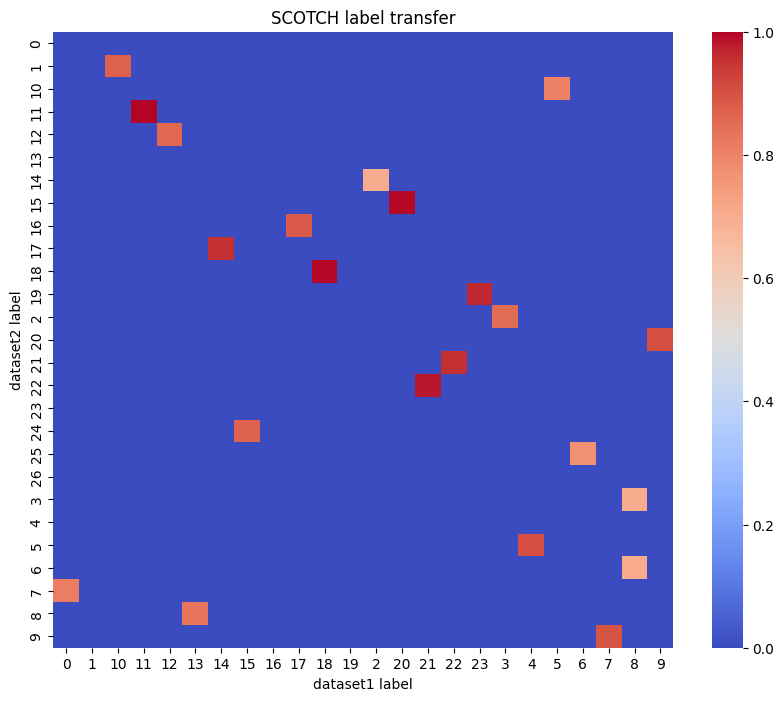

In [12]:
adata1, adata2, transfer_df = scotch_transfer( test_data = adata1,reference_data = adata2,test_avg_by='leiden',reference_avg_by='leiden',reg=1)
plot_heatmap(transfer_df)

## Cell alignment calculates matching relationships

In [15]:
ann1, ann2 = intersect_datasets(data1 = adata1, data2 = adata2)
ann1.obs['cell_type'] = ann1.obs['leiden']
ann2.obs['cell_type'] = ann2.obs['leiden']

/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [16]:
result = scotch_alignment(ann1, ann2)

Performing SCOTCH alignment...
Processing cell type 1/21: 14
mass : 0.45722713864306785
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 2/21: 6
mass : 0.8704453441295547
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 3/21: 7
mass : 0.6147959183673469
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 4/21: 25
mass : 0.18021201413427562
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 5/21: 10
mass : 0.6767676767676768
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 6/21: 5
mass : 0.9800664451827242
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 7/21: 22
mass : 0.7375
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 8/21: 2
mass : 0.984375
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 9/21: 8
mass : 0.5545851528384279
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 10/21: 15
mass : 0.5461538461538461
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 11/21: 1
mass : 0.31026785714285715
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 12/21: 19
mass : 0.4105263157894737
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 13/21: 17
mass : 0.9752066115702479
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 14/21: 9
mass : 0.9307359307359307
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 15/21: 16
mass : 0.6829268292682927
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 16/21: 12
mass : 0.6827956989247311
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 17/21: 20
mass : 0.6012658227848101
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 18/21: 18
mass : 0.78
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 19/21: 11
mass : 0.6808510638297872
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 20/21: 21
mass : 0.5862068965517241
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 21/21: 24
mass : 0.6082474226804123
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
SCOTCH alignment completed.


## Data integration using matching relationships

Integrating and concatenating AnnData objects...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Integration and concatenation completed.


... storing 'leiden' as categorical


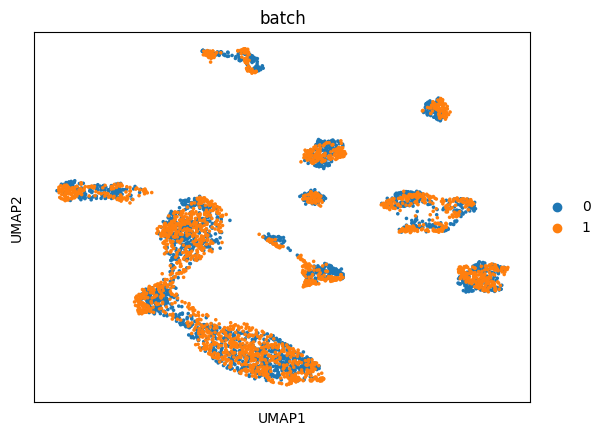

In [21]:
adata1, adata2, adata_merged = integrate_adata(adata1=rna, adata2=gam, df=result, n_components = 30, max_iter = 1000,cca_components = 10)
sc.pp.neighbors(adata_merged, use_rep="integrated", metric="cosine")
sc.tl.umap(adata_merged)
sc.pl.umap(adata_merged, color="batch")

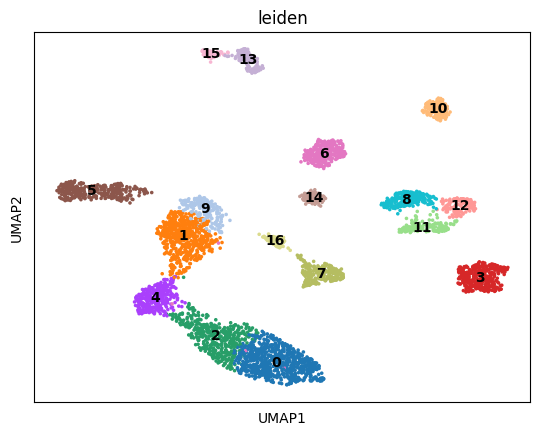

In [19]:
sc.tl.leiden(adata_merged,resolution = 0.9)
sc.pl.umap(adata_merged, color="leiden",legend_loc="on data")

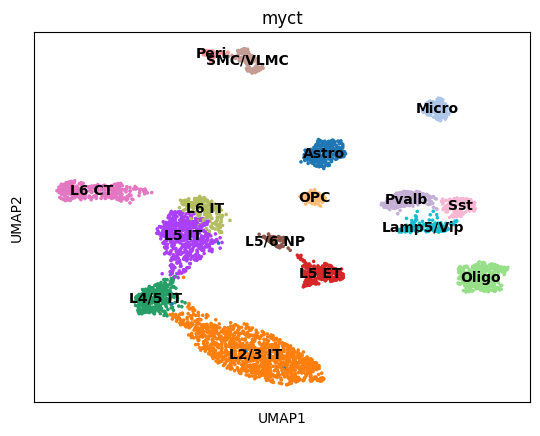

In [20]:
cluster2annotation = {
     '0': 'L2/3 IT',
     '1': 'L5 IT',
     '2': 'L2/3 IT',
     '3': 'Oligo',
     '4': 'L4/5 IT',
     '5': 'L6 CT',
     '6': 'Astro',
     '7': 'L5 ET',
     '8': 'Pvalb',
    '9': 'L6 IT',
    '10': 'Micro',
    '11': 'Lamp5/Vip',
    '12': 'Sst',
    '13': 'SMC/VLMC',
    '14': 'OPC',
    '15': 'Peri',
    '16': 'L5/6 NP'
}
# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata_merged.obs['myct'] = adata_merged.obs['leiden'].map(cluster2annotation).astype('category')

sc.pl.umap(adata_merged, color="myct",legend_loc="on data")